<a href="https://colab.research.google.com/github/Manasvi-Shahare/Chicago-Crimes-Analysis-using-Big-Data/blob/main/Big_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

zsh:1: command not found: apt-get
zsh:1: command not found: wget
tar: Error opening archive: Failed to open 'spark-2.4.5-bin-hadoop2.7.tgz'


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
import csv
from pyspark.sql.types import *
from pyspark.sql.functions import format_number, when
import pyspark.sql.functions as F

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
spark = SparkSession.builder.appName("Big Data Project")\
.config("spark.some.config.option", "some-value")\
.config("spark.driver.memory", "20g")\
.config("spark.driver.cores", '3')\
.getOrCreate()

In [ ]:
crimes_schema = StructType([StructField("ID", IntegerType(), True),
                            StructField("Case Number", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("Primary Type", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("Location Description", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", IntegerType(), True),
                            StructField("District", IntegerType(), True),
                            StructField("Ward", IntegerType(), True),
                            StructField("Community Area", IntegerType(), True),
                            StructField("FBI Code", StringType(), True ),
                            StructField("X Coordinate", IntegerType(), True),
                            StructField("Y Coordinate", IntegerType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("Updated On", StringType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

In [ ]:
df = spark.read.csv('/Users/user/Desktop/Big Data/Project/Crimes_-_2001_to_Present.csv',header = True,schema = crimes_schema)

In [ ]:
df.head(5)

[Row(ID=10224738, Case Number='HY411648', Date='09/05/2015 01:30:00 PM', Block='043XX S WOOD ST', IUCR='0486', Primary Type='BATTERY', Description='DOMESTIC BATTERY SIMPLE', Location Description='RESIDENCE', Arrest=False, Domestic=True, Beat=924, District=9, Ward=12, Community Area=61, FBI Code='08B', X Coordinate=1165074, Y Coordinate=1875917, Year=2015, Updated On='02/10/2018 03:50:01 PM', Latitude=41.815117282, Longitude=-87.669999562, Location='(41.815117282, -87.669999562)'),
 Row(ID=10224739, Case Number='HY411615', Date='09/04/2015 11:30:00 AM', Block='008XX N CENTRAL AVE', IUCR='0870', Primary Type='THEFT', Description='POCKET-PICKING', Location Description='CTA BUS', Arrest=False, Domestic=False, Beat=1511, District=15, Ward=29, Community Area=25, FBI Code='06', X Coordinate=1138875, Y Coordinate=1904869, Year=2015, Updated On='02/10/2018 03:50:01 PM', Latitude=41.895080471, Longitude=-87.765400451, Location='(41.895080471, -87.765400451)'),
 Row(ID=11646166, Case Number='JC21

In [ ]:
df.limit(5).toPandas().head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,None
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
df = df.filter((df['Year'] >2016) & (df['Year'] !=2022))

In [ ]:
df = df.drop('ID')
df = df.drop('Case Number')
df = df.drop('FBI Code')
df = df.drop('Updated On')
df = df.drop('IUCR')
df = df.drop('X Coordinate')
df = df.drop('Y Coordinate')
df = df.drop('Location')
df = df.drop('Description')
df = df.drop('Domestic')

In [ ]:
df = df.na.drop()
df.count()

1194828

In [ ]:
df.columns

['Date',
 'Block',
 'Primary Type',
 'Location Description',
 'Arrest',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'Year',
 'Latitude',
 'Longitude']

In [ ]:
primaryCount = df.groupby('Primary Type').count()
primaryCount.orderBy('count', ascending=False).show()

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|               THEFT|268762|
|             BATTERY|230050|
|     CRIMINAL DAMAGE|132807|
|             ASSAULT| 98651|
|  DECEPTIVE PRACTICE| 82384|
|       OTHER OFFENSE| 76660|
|           NARCOTICS| 50625|
| MOTOR VEHICLE THEFT| 50618|
|            BURGLARY| 49579|
|             ROBBERY| 45284|
|   WEAPONS VIOLATION| 33824|
|   CRIMINAL TRESPASS| 28011|
|OFFENSE INVOLVING...| 10292|
|PUBLIC PEACE VIOL...|  6238|
|         SEX OFFENSE|  5205|
|INTERFERENCE WITH...|  4900|
| CRIM SEXUAL ASSAULT|  3755|
|CRIMINAL SEXUAL A...|  3475|
|            HOMICIDE|  3390|
|        PROSTITUTION|  2501|
+--------------------+------+
only showing top 20 rows



In [ ]:
df=df\
            .withColumn("Final_Date", F.to_date(F.split(df.Date, " ")[0], "MM/dd/yyyy"))
df.limit(10).toPandas().head()

,Date,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Final_Date
0,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,THEFT,STREET,False,1634,16,45,15,2020,41.952052,-87.754660,2020-03-17
1,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,COMMERCIAL / BUSINESS OFFICE,False,132,1,3,33,2019,41.852248,-87.623786,2019-09-24
2,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,THEFT,GROCERY FOOD STORE,False,1221,12,26,24,2019,41.895732,-87.687784,2019-10-13
3,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,APARTMENT,False,1132,11,28,26,2020,41.877110,-87.723990,2020-03-18
4,10/05/2019 06:30:00 PM,0000X N LOOMIS ST,THEFT,RESIDENCE,False,1224,12,27,28,2019,41.882002,-87.662287,2019-10-05


In [ ]:
df=df.withColumn("Week", F.dayofweek(df.Final_Date))
df.limit(10).toPandas().head()

,Date,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Final_Date,Week
0,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,THEFT,STREET,False,1634,16,45,15,2020,41.952052,-87.754660,2020-03-17,3
1,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,COMMERCIAL / BUSINESS OFFICE,False,132,1,3,33,2019,41.852248,-87.623786,2019-09-24,3
2,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,THEFT,GROCERY FOOD STORE,False,1221,12,26,24,2019,41.895732,-87.687784,2019-10-13,1
3,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,APARTMENT,False,1132,11,28,26,2020,41.877110,-87.723990,2020-03-18,4
4,10/05/2019 06:30:00 PM,0000X N LOOMIS ST,THEFT,RESIDENCE,False,1224,12,27,28,2019,41.882002,-87.662287,2019-10-05,7


In [ ]:
df=df.withColumn("Month", F.month(df.Final_Date))
df.limit(10).toPandas().head()

,Date,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Final_Date,Week,Month
0,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,THEFT,STREET,False,1634,16,45,15,2020,41.952052,-87.754660,2020-03-17,3,3
1,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,COMMERCIAL / BUSINESS OFFICE,False,132,1,3,33,2019,41.852248,-87.623786,2019-09-24,3,9
2,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,THEFT,GROCERY FOOD STORE,False,1221,12,26,24,2019,41.895732,-87.687784,2019-10-13,1,10
3,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,APARTMENT,False,1132,11,28,26,2020,41.877110,-87.723990,2020-03-18,4,3
4,10/05/2019 06:30:00 PM,0000X N LOOMIS ST,THEFT,RESIDENCE,False,1224,12,27,28,2019,41.882002,-87.662287,2019-10-05,7,10


In [ ]:
df=df.withColumn("Day", F.dayofweek(df.Final_Date))
df.limit(10).toPandas().head()

,Date,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Final_Date,Week,Month,Day
0,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,THEFT,STREET,False,1634,16,45,15,2020,41.952052,-87.754660,2020-03-17,3,3,3
1,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,COMMERCIAL / BUSINESS OFFICE,False,132,1,3,33,2019,41.852248,-87.623786,2019-09-24,3,9,3
2,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,THEFT,GROCERY FOOD STORE,False,1221,12,26,24,2019,41.895732,-87.687784,2019-10-13,1,10,1
3,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,APARTMENT,False,1132,11,28,26,2020,41.877110,-87.723990,2020-03-18,4,3,4
4,10/05/2019 06:30:00 PM,0000X N LOOMIS ST,THEFT,RESIDENCE,False,1224,12,27,28,2019,41.882002,-87.662287,2019-10-05,7,10,7


In [ ]:
df=df\
        .filter((df["Latitude"] < 45)
             & (df["Latitude"] > 40)
             & (df["Longitude"] < -85)
             & (df["Longitude"] > -90))

In [ ]:
df1 = df.toPandas()

In [ ]:
df1.columns

Index(['Date', 'Block', 'Primary Type', 'Location Description', 'Arrest',
       'Beat', 'District', 'Ward', 'Community Area', 'Year', 'Latitude',
       'Longitude', 'Final_Date', 'Week', 'Month', 'Day'],
      dtype='object')

In [ ]:
df1.head()

,Date,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Final_Date,Week,Month,Day
0,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,THEFT,STREET,False,1634,16,45,15,2020,41.952052,-87.754660,2020-03-17,3,3,3
1,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,COMMERCIAL / BUSINESS OFFICE,False,132,1,3,33,2019,41.852248,-87.623786,2019-09-24,3,9,3
2,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,THEFT,GROCERY FOOD STORE,False,1221,12,26,24,2019,41.895732,-87.687784,2019-10-13,1,10,1
3,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,APARTMENT,False,1132,11,28,26,2020,41.877110,-87.723990,2020-03-18,4,3,4
4,10/05/2019 06:30:00 PM,0000X N LOOMIS ST,THEFT,RESIDENCE,False,1224,12,27,28,2019,41.882002,-87.662287,2019-10-05,7,10,7


In [ ]:
df1 = df1.drop('Date',axis=1)

In [ ]:
df1 = df1.drop('Final_Date',axis=1)

In [ ]:
df1.head()

,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Week,Month,Day
0,039XX N LECLAIRE AVE,THEFT,STREET,False,1634,16,45,15,2020,41.952052,-87.754660,3,3,3
1,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,COMMERCIAL / BUSINESS OFFICE,False,132,1,3,33,2019,41.852248,-87.623786,3,9,3
2,024XX W CHICAGO AVE,THEFT,GROCERY FOOD STORE,False,1221,12,26,24,2019,41.895732,-87.687784,1,10,1
3,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,APARTMENT,False,1132,11,28,26,2020,41.877110,-87.723990,4,3,4
4,0000X N LOOMIS ST,THEFT,RESIDENCE,False,1224,12,27,28,2019,41.882002,-87.662287,7,10,7


                                        MACHINE LEARNING ALGORITHM STARTS

In [ ]:
df1 = df1.replace(to_replace='None', value=np.nan).dropna()

                                Creating One hot Label Encoder for the features

In [ ]:
labelEncoder = LabelEncoder()

In [ ]:
primaryEncoded = labelEncoder.fit_transform(df1['Primary Type'])
primaryEncoded

array([32,  9, 32, ..., 22, 22, 22])

In [ ]:
df1['Primary Type'] = primaryEncoded


In [ ]:
labelEncoder2 = LabelEncoder()

In [ ]:
locDiscEncoded = labelEncoder2.fit_transform(df1['Location Description'])
locDiscEncoded

array([161,  56,  91, ...,  19,  19, 135])

In [ ]:
df1['Location Description'] = locDiscEncoded

In [ ]:
labelEncoder3 = LabelEncoder()

In [ ]:
blockEncoded = labelEncoder2.fit_transform(df1['Location Description'])
blockEncoded

array([161,  56,  91, ...,  19,  19, 135])

In [ ]:
df1['Block'] = locDiscEncoded


In [ ]:
from sklearn.decomposition import PCA

location = df1[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=100)


loc = pca.fit_transform(location)


df1['Location'] = loc


df1.head(5)

,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Week,Month,Day,Location
0,161,32,161,False,1634,16,45,15,2020,41.952052,-87.754660,3,3,3,0.135458
1,56,9,56,False,132,1,3,33,2019,41.852248,-87.623786,3,9,3,-0.012868
2,91,32,91,False,1221,12,26,24,2019,41.895732,-87.687784,1,10,1,0.054923
3,19,17,19,False,1132,11,28,26,2020,41.877110,-87.723990,4,3,4,0.054758
4,135,32,135,False,1224,12,27,28,2019,41.882002,-87.662287,7,10,7,0.031117


                            We are just taking a small amount of data just for the start

In [ ]:
df1_little = df1.sample(frac=0.1, random_state=123)


                                        KNN ML START FROM HERE

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

In [ ]:
X = df1_little.loc[:, df1.columns != 'Primary Type']

model.fit(X,df1_little['Primary Type'])


ExtraTreesClassifier()

In [ ]:
correlation_matrix = df1.corr()
correlation_matrix

,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Week,Month,Day,Location
Block,1.000000,0.126239,1.000000,0.042700,0.007728,0.008044,-0.010672,0.021605,-0.060912,-0.046304,-0.014394,0.003775,0.008894,0.003775,-0.033780
Primary Type,0.126239,1.000000,0.126239,0.035387,0.031127,0.031164,0.063215,-0.082289,-0.030023,0.082877,0.010464,0.014968,0.009039,0.014968,0.064809
Location Description,1.000000,0.126239,1.000000,0.042700,0.007728,0.008044,-0.010672,0.021605,-0.060912,-0.046304,-0.014394,0.003775,0.008894,0.003775,-0.033780
Arrest,0.042700,0.035387,0.042700,1.000000,-0.034331,-0.034445,-0.022364,0.027089,-0.063605,-0.035919,-0.027107,0.006441,-0.032294,0.006441,-0.021673
Beat,0.007728,0.031127,0.007728,-0.034331,1.000000,0.999752,0.648431,-0.485473,0.001822,0.630033,-0.540902,0.001727,0.004339,0.001727,0.669018
District,0.008044,0.031164,0.008044,-0.034445,0.999752,1.000000,0.649672,-0.485962,0.001813,0.631280,-0.541943,0.001761,0.004403,0.001761,0.670334
Ward,-0.010672,0.063215,-0.010672,-0.022364,0.648431,0.649672,1.000000,-0.522752,-0.008421,0.659927,-0.446993,0.006881,0.005058,0.006881,0.666778
Community Area,0.021605,-0.082289,0.021605,0.027089,-0.485473,-0.485962,-0.522752,1.000000,0.014561,-0.770662,0.234774,-0.008104,-0.008901,-0.008104,-0.697030
Year,-0.060912,-0.030023,-0.060912,-0.063605,0.001822,0.001813,-0.008421,0.014561,1.000000,-0.013661,0.000881,-0.002442,0.006461,-0.002442,-0.011423
Latitude,-0.046304,0.082877,-0.046304,-0.035919,0.630033,0.631280,0.659927,-0.770662,-0.013661,1.000000,-0.538410,0.006720,0.006981,0.006720,0.970896


<AxesSubplot:>

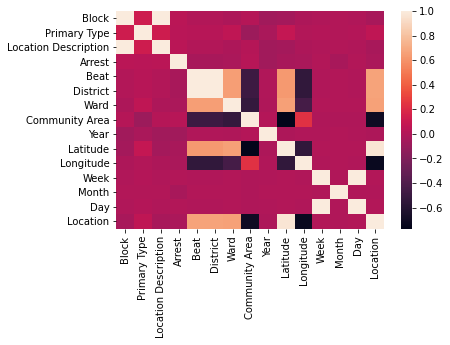

In [ ]:
sns.heatmap(correlation_matrix)

In [ ]:
columns_selection = ['Latitude','Longitude','Location Description','Block','Day']

                The data has been splitted into 80% to 20% ration which is 80% training and 20% testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1[columns_selection], df1['Primary Type'], test_size=0.2)

                                    KNN Classifier Model Building

                                     Taking the value of k as 5

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train,y_train)
pred_train = knn_5.predict(X_train)
pred_i = knn_5.predict(X_test)
print('Testing accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Testing accuracy  0.46850270960182455
Accuracy  0.2724780931178494
F1 score  0.26023919445754157


In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=20)
knn_5.fit(X_train,y_train)
pred_train = knn_5.predict(X_train)
pred_i = knn_5.predict(X_test)
print('Testing accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Testing accuracy  0.3771347268428431
Accuracy  0.3125842170015818
F1 score  0.27458966600976864


In [ ]:
error_rate = []

krange = range(10,50,5)
for i in krange:

 knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights = 'uniform',n_jobs= -1) # haversine - if only lat long
 knn.fit(X_train,y_train)
 pred_train = knn.predict(X_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
 print('Neighbours ',i)
 print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
 print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
 print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Neighbours  10
Test accuracy  0.41161048689138574
Accuracy  0.2958245105998343
F1 score  0.27148736328671036
Neighbours  15
Test accuracy  0.38950160065281525
Accuracy  0.30645363775599876
F1 score  0.2738500277174768
Neighbours  20
Test accuracy  0.3780815182139644
Accuracy  0.3129148079643129
F1 score  0.2751242552304702
Neighbours  25
Test accuracy  0.36991191178624483
Accuracy  0.3174552028322021
F1 score  0.2752984311410973
Neighbours  30
Test accuracy  0.36486933232900215
Accuracy  0.32039704393093577
F1 score  0.274804864897689
Neighbours  35
Test accuracy  0.3608227146234804
Accuracy  0.32268188779993806
F1 score  0.27448541830030493
Neighbours  40
Test accuracy  0.3579007386018873
Accuracy  0.323569043294862
F1 score  0.27318191365945654
Neighbours  45
Test accuracy  0.35578745841441217
Accuracy  0.3243097344392089
F1 score  0.2720793447614696


Text(0, 0.5, 'Error Rate')

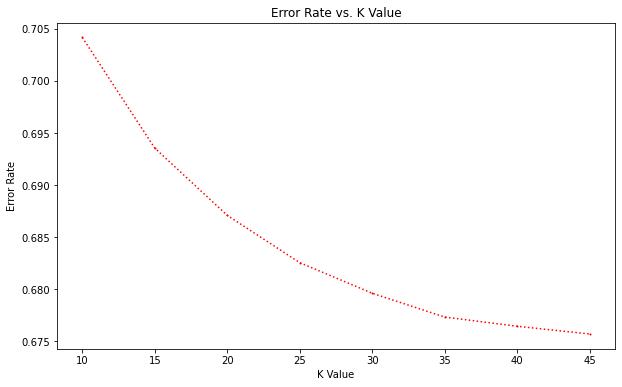

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(krange,error_rate, color= 'red', linestyle= 'dotted', marker= 'o', markerfacecolor='red', markersize=1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

                                        K = 25 gives us the optimum answer